# Credit Card Approval Prediction

## Problem description

**Background:**
Credit card approval is a critical process for financial institutions to manage risk and make informed lending decisions. The approval or denial of credit cards is influenced by various factors such as applicant demographics, financial history, and credit behavior. Predicting credit card approval accurately is crucial for maintaining a healthy credit portfolio and avoiding potential losses.

**Objective:**
The primary objective of this project is to predict credit card approval for applicants based on historical data and relevant features. By leveraging machine learning models, my aim to enhance the accuracy of credit card approval predictions and identify key determinants influencing the decision.

**Problem Description:**
Credit card approval prediction involves assessing the likelihood of an applicant being approved for a credit card based on their individual and financial characteristics. This predictive modeling task is crucial for financial institutions to streamline the approval process and minimize the risk of defaults.

## Dataset description

The dataset for this project is sourced from Kaggle: **Credit Card Approval Dataset**. The dataset includes various features such as income, age, employment details, and other relevant information about credit card applicants.

Credit Card Dataset Originally from Seanny (@rikdifos)

This dataset is merged, cleaned, and transformed using Pentaho Data Integration. Full explanation is available on GitHub (https://github.com/caesarmario/etl-credit-card-dataset-using-pentaho)

#### Columns description

* Applicant_ID - Client number
* Applicant_Gender - Gender
* Owned_Car - Is there a car
* Owned_Realty - Is there a property
* Total_Children - Number of children
* Total_Income - Annual income
* Income_Type - Income category
* Education_Type - Education level
* Family_Status - Marital status
* Housing_Type - Way of living
* Owned_Mobile_Phone - Is there a mobile phone
* Owned_Work_Phone - Is there a work phone
* Owned_Phone - Is there a phone
* Owned_Email - Is there an email
* Job_Title - Occupation
* Total_Family_Members - Family size
* Applicant_Age - Age
* Years_of_Working - Working years
* Total_Bad_Debt - Number of bad debts
* Total_Good_Debt - Number of good debts
* Status - 0 means not approved, 1 means approved.

## Dependencies loading

In [92]:
conda install -c conda-forge imbalanced-learn

Retrieving notices: ...working... done
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



## Package Plan ##

  environment location: /Users/tianguozhao/opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.11.0    |     pyhd8ed1ab_0         138 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         138 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.11.0-pyhd8ed1ab_0 



                          

In [248]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

### Data loading

In [249]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("Application_Data.csv")

In [250]:
df.sample(10)

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
19351,5116504,M,1,1,0,225000,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Sales staff ...,2,25,2,0,26,1
66,5008894,F,0,1,0,297000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,Rented apartment ...,1,0,0,0,Laborers ...,1,43,9,0,37,1
24913,5149903,F,0,1,0,126000,Working ...,Higher education ...,Married ...,House / apartment ...,1,0,0,0,Core staff ...,2,49,3,0,12,1
10473,5065593,F,1,0,1,90000,State servant ...,Secondary / secondary special ...,Married ...,Municipal apartment ...,1,1,1,0,Medicine staff ...,3,39,20,0,24,1
21099,5126054,F,1,0,1,67500,State servant ...,Higher education ...,Married ...,House / apartment ...,1,1,0,0,High skill tech staff ...,3,38,15,0,13,1
19471,5116770,F,0,1,0,121500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Laborers ...,2,61,6,0,7,1
17206,5105700,F,1,0,0,225000,Working ...,Secondary / secondary special ...,Married ...,Municipal apartment ...,1,0,0,0,Laborers ...,2,34,2,0,16,1
9595,5061222,F,1,1,0,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,1,Cleaning staff ...,2,58,4,0,17,1
14544,5091194,F,0,1,1,67500,Working ...,Secondary / secondary special ...,Separated ...,House / apartment ...,1,1,1,0,Accountants ...,2,31,6,0,8,1
4899,5033960,F,1,0,0,292500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Laborers ...,2,43,9,0,12,1


# Data Exploration and Preprocessing

## Investigate STATUS value distribution

**STATUS** is a dependent data (label) in data. 0 means **not approved**, 1 means **approved**.

In [251]:
df["Status"].value_counts()

1    25007
0      121
Name: Status, dtype: int64

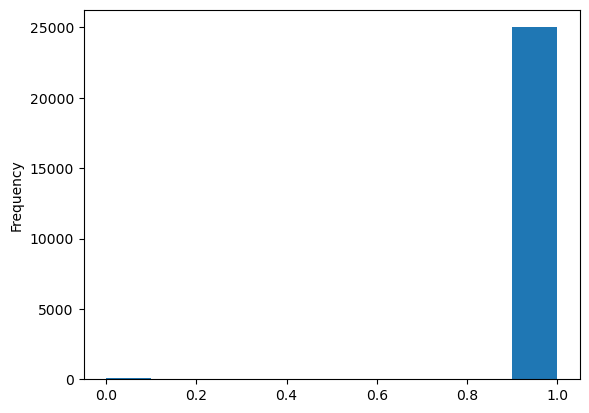

In [252]:
df['Status'].astype(int).plot.hist();

**Key Point**: From the histogram above we can see that the distribution of status is **unbalanced**. Most data contains **approved** (1).

## Investigate Data Types

In [253]:
print(df.dtypes)

Applicant_ID             int64
Applicant_Gender        object
Owned_Car                int64
Owned_Realty             int64
Total_Children           int64
Total_Income             int64
Income_Type             object
Education_Type          object
Family_Status           object
Housing_Type            object
Owned_Mobile_Phone       int64
Owned_Work_Phone         int64
Owned_Phone              int64
Owned_Email              int64
Job_Title               object
Total_Family_Members     int64
Applicant_Age            int64
Years_of_Working         int64
Total_Bad_Debt           int64
Total_Good_Debt          int64
Status                   int64
dtype: object


# Investigate possible invalid data

In [254]:
df.describe()

,Applicant_ID,Owned_Car,Owned_Realty,Total_Children,Total_Income,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
count,2.512800e+04,25128.000000,25128.000000,25128.000000,2.512800e+04,25128.0,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000
mean,5.078835e+06,0.418378,0.654927,0.509472,1.948365e+05,1.0,0.273758,0.292741,0.100684,2.291309,40.995503,7.690903,0.333095,21.057545,0.995185
std,4.194378e+04,0.493303,0.475402,0.762937,1.045211e+05,0.0,0.445895,0.455030,0.300916,0.928871,9.552832,6.415007,1.569448,14.735347,0.069227
min,5.008806e+06,0.000000,0.000000,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,21.000000,1.000000,0.000000,1.000000,0.000000
25%,5.042226e+06,0.000000,0.000000,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,33.000000,3.000000,0.000000,9.000000,1.000000
50%,5.079004e+06,0.000000,1.000000,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,40.000000,6.000000,0.000000,18.000000,1.000000
75%,5.115603e+06,1.000000,1.000000,1.000000,2.250000e+05,1.0,1.000000,1.000000,0.000000,3.000000,48.000000,10.000000,0.000000,31.000000,1.000000
max,5.150487e+06,1.000000,1.000000,5.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,7.000000,68.000000,44.000000,49.000000,61.000000,1.000000


From the table we see that there are no particularly abnormal data.

## Handle missing values

In [255]:
df.isna().sum()

Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
Status                  0
dtype: int64

It can be seen from the statistics that our data has no missing data.

# Feature Selection

##  1. Correlation Analysis

In [257]:
# Find correlation with the Status and sort
correlations = df.corr()['Status'].sort_values()

# Display correlations
print('Most Postive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Postive Correlations:
 Total_Bad_Debt         -0.458497
Applicant_ID           -0.011544
Owned_Email            -0.009203
Total_Income           -0.003482
Owned_Car              -0.001604
Owned_Realty            0.002716
Owned_Phone             0.004323
Owned_Work_Phone        0.005318
Total_Family_Members    0.010056
Applicant_Age           0.010078
Total_Children          0.011036
Years_of_Working        0.021382
Total_Good_Debt         0.074516
Status                  1.000000
Owned_Mobile_Phone           NaN
Name: Status, dtype: float64

Most Negative Correlations:
 Total_Bad_Debt         -0.458497
Applicant_ID           -0.011544
Owned_Email            -0.009203
Total_Income           -0.003482
Owned_Car              -0.001604
Owned_Realty            0.002716
Owned_Phone             0.004323
Owned_Work_Phone        0.005318
Total_Family_Members    0.010056
Applicant_Age           0.010078
Total_Children          0.011036
Years_of_Working        0.021382
Total_Good_Debt       

It can be seen from the above correlation that the features with relatively high correlation (greater than 0.05) with the target are:

**Total_Good_Debt**: This feature represents that good debt is positively related to credit card approval. The more good debt you have, the higher your chances of being approved for a credit card (1).

## 2. Investigate object-typed attribute distribution

Correlation Analysis can only analyze attributes with numeric type. Meanwhile, object-type data may could be a good feature too. So I want to visualize the distribution of some object-typed attribute on Status=0 and Status=1.

### Total_Good_Debt

/Users/tianguozhao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/tianguozhao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


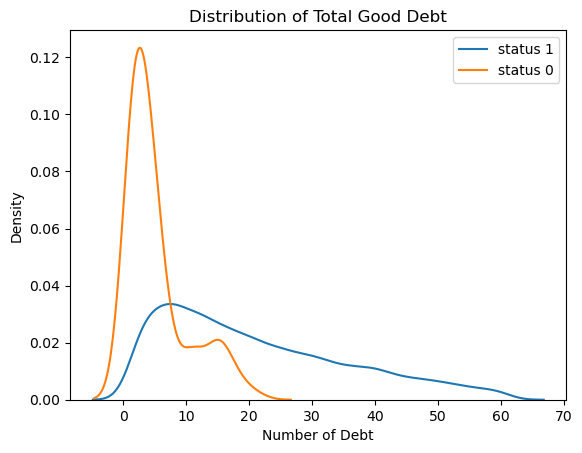

In [258]:
plt.figure()

sns.distplot(df.loc[df["Status"]==1, "Total_Good_Debt"], hist=False, label = "status 1")
sns.distplot(df.loc[df["Status"]==0, "Total_Good_Debt"], hist=False, label = "status 0")

plt.xlabel('Number of Debt'); plt.ylabel('Density'); plt.title("Distribution of Total Good Debt"); plt.legend()
plt.show()

### Years_of_Working

/Users/tianguozhao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/tianguozhao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


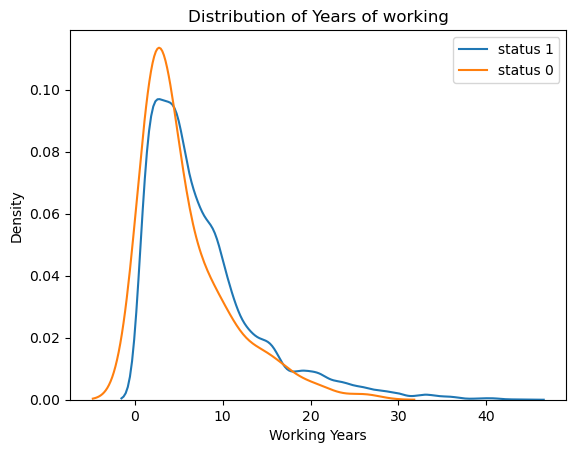

In [259]:
plt.figure()

sns.distplot(df.loc[df["Status"]==1, "Years_of_Working"], hist=False, label = "status 1")
sns.distplot(df.loc[df["Status"]==0, "Years_of_Working"], hist=False, label = "status 0")

plt.xlabel('Working Years'); plt.ylabel('Density'); plt.title("Distribution of Years of working"); plt.legend()
plt.show()

### Total_Income

/Users/tianguozhao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/tianguozhao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


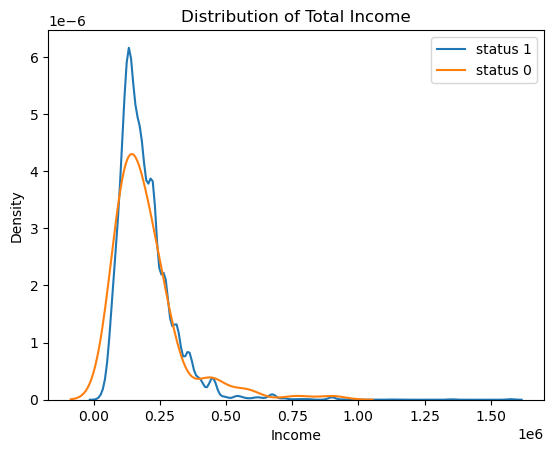

In [260]:
plt.figure()

sns.distplot(df.loc[df["Status"]==1, "Total_Income"], hist=False, label = "status 1")
sns.distplot(df.loc[df["Status"]==0, "Total_Income"], hist=False, label = "status 0")

plt.xlabel('Income'); plt.ylabel('Density'); plt.title("Distribution of Total Income"); plt.legend()
plt.show()

### Applicant_Age

/Users/tianguozhao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/tianguozhao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


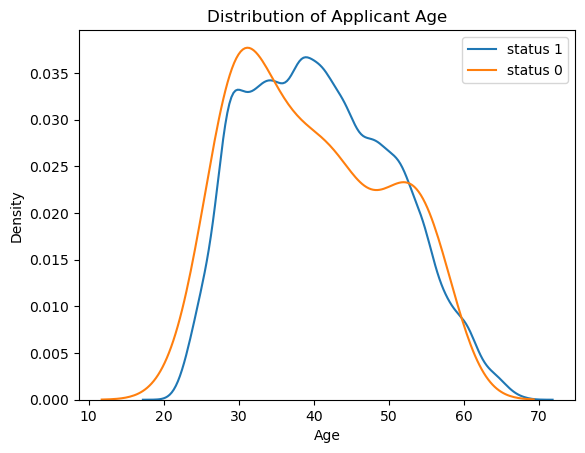

In [261]:
plt.figure()

sns.distplot(df.loc[df["Status"]==1, "Applicant_Age"], hist=False, label = "status 1")
sns.distplot(df.loc[df["Status"]==0, "Applicant_Age"], hist=False, label = "status 0")

plt.xlabel('Age'); plt.ylabel('Density'); plt.title("Distribution of Applicant Age"); plt.legend()
plt.show()

### Income_Type

Text(0.5, 0, 'status 0')

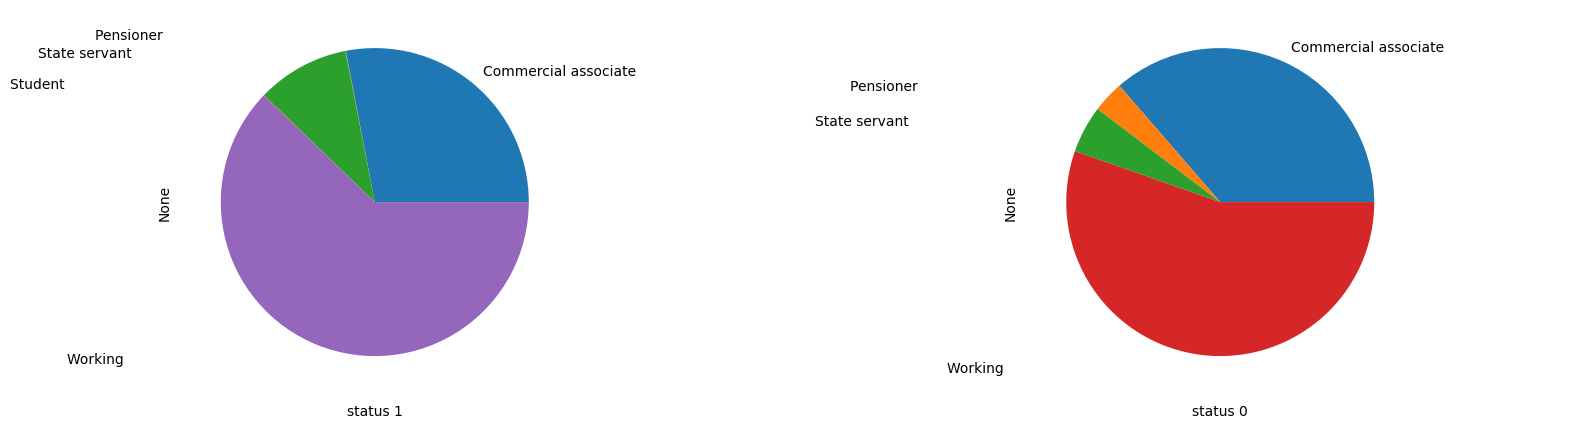

In [262]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
df.loc[df["Status"]==1, "Income_Type"].reset_index().groupby("Income_Type").size().plot(kind="pie", ax=ax1)
df.loc[df["Status"]==0, "Income_Type"].reset_index().groupby("Income_Type").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("status 1")
ax2.set_xlabel("status 0")

### Job_Title

Text(0.5, 0, 'status 0')

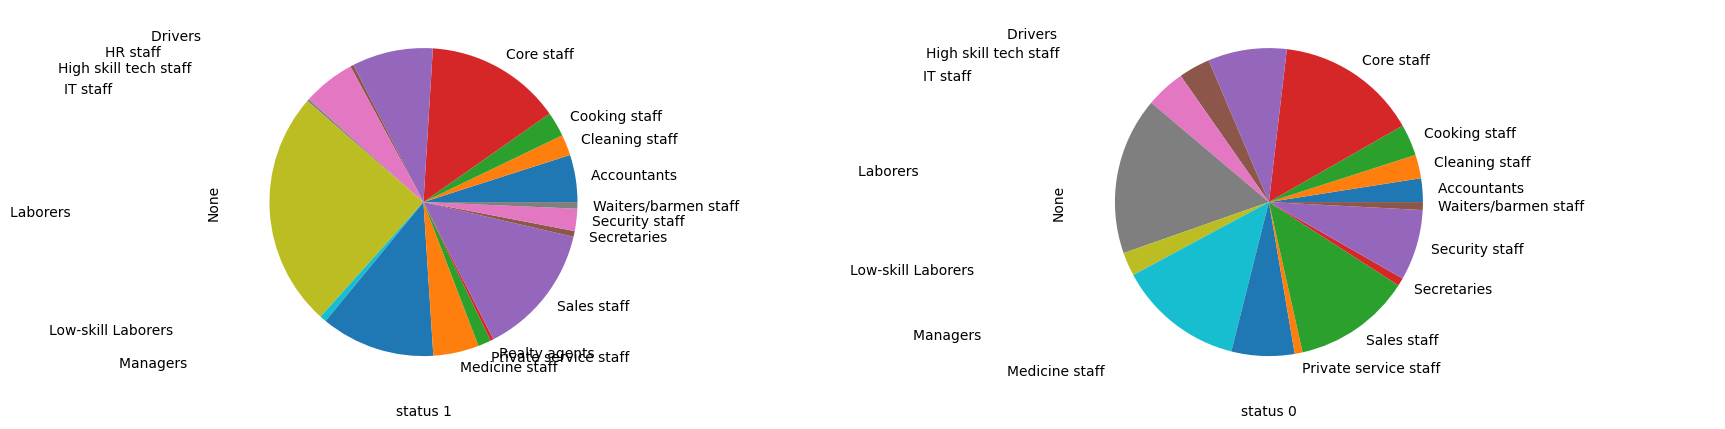

In [263]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
df.loc[df["Status"]==1, "Job_Title"].reset_index().groupby("Job_Title").size().plot(kind="pie", ax=ax1)
df.loc[df["Status"]==0, "Job_Title"].reset_index().groupby("Job_Title").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("status 1")
ax2.set_xlabel("status 0")

### Applicant_Gender

Text(0.5, 0, 'status 0')

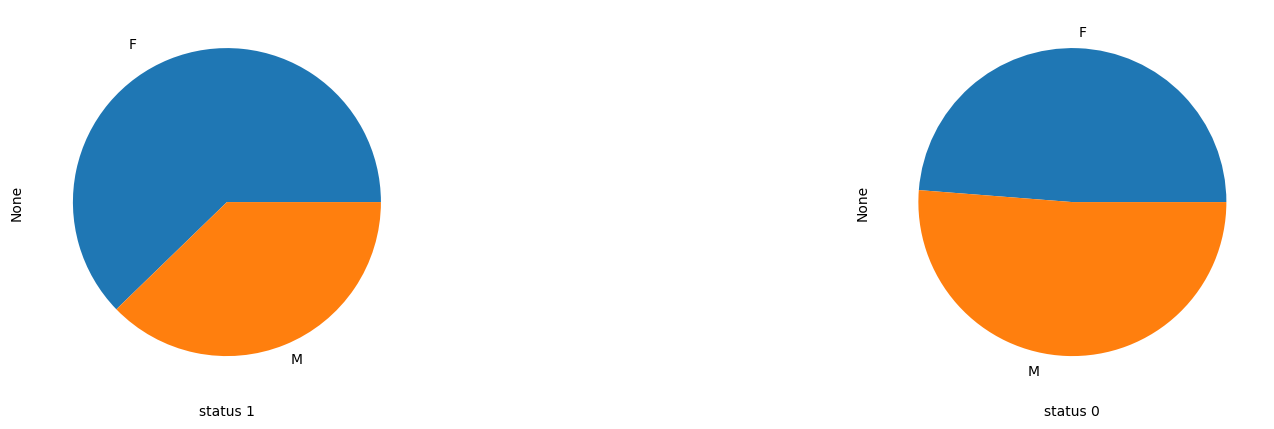

In [264]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
df.loc[df["Status"]==1, "Applicant_Gender"].reset_index().groupby("Applicant_Gender").size().plot(kind="pie", ax=ax1)
df.loc[df["Status"]==0, "Applicant_Gender"].reset_index().groupby("Applicant_Gender").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("status 1")
ax2.set_xlabel("status 0")

### Education_Type

Text(0.5, 0, 'status 0')

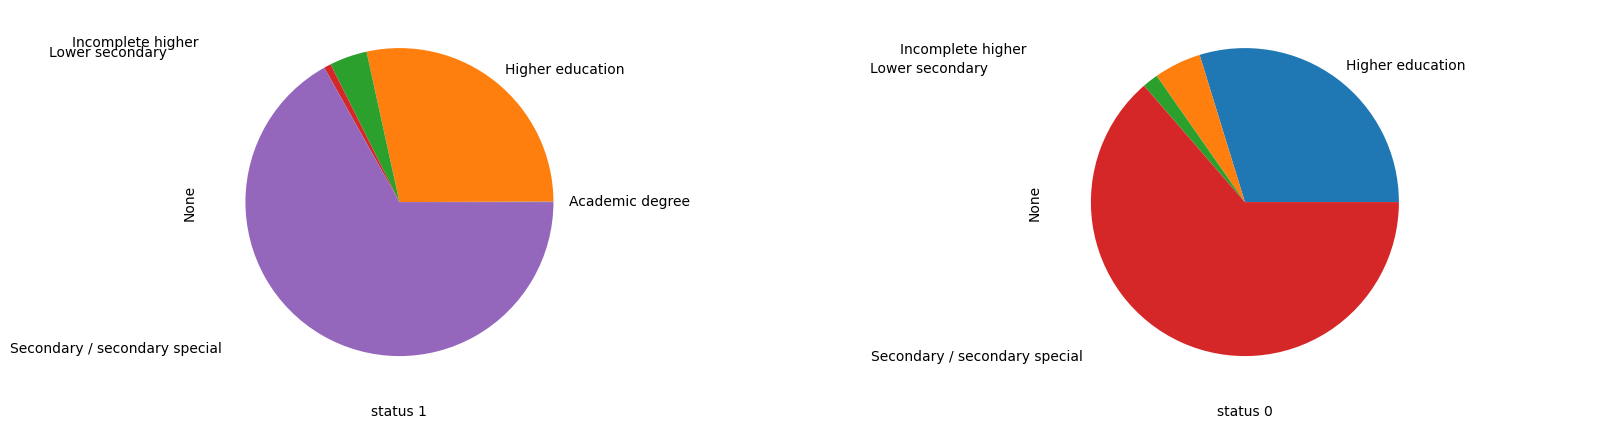

In [265]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
df.loc[df["Status"]==1, "Education_Type"].reset_index().groupby("Education_Type").size().plot(kind="pie", ax=ax1)
df.loc[df["Status"]==0, "Education_Type"].reset_index().groupby("Education_Type").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("status 1")
ax2.set_xlabel("status 0")

### Family_Status

Text(0.5, 0, 'status 0')

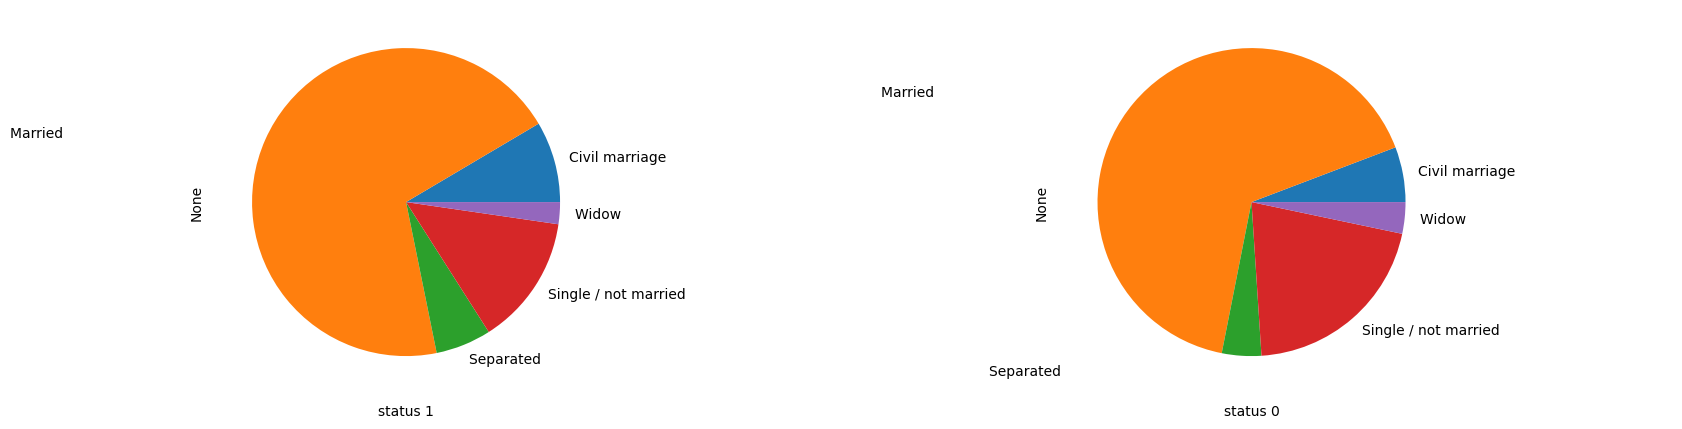

In [266]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
df.loc[df["Status"]==1, "Family_Status"].reset_index().groupby("Family_Status").size().plot(kind="pie", ax=ax1)
df.loc[df["Status"]==0, "Family_Status"].reset_index().groupby("Family_Status").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("status 1")
ax2.set_xlabel("status 0")

### Housing_Type

Text(0.5, 0, 'status 0')

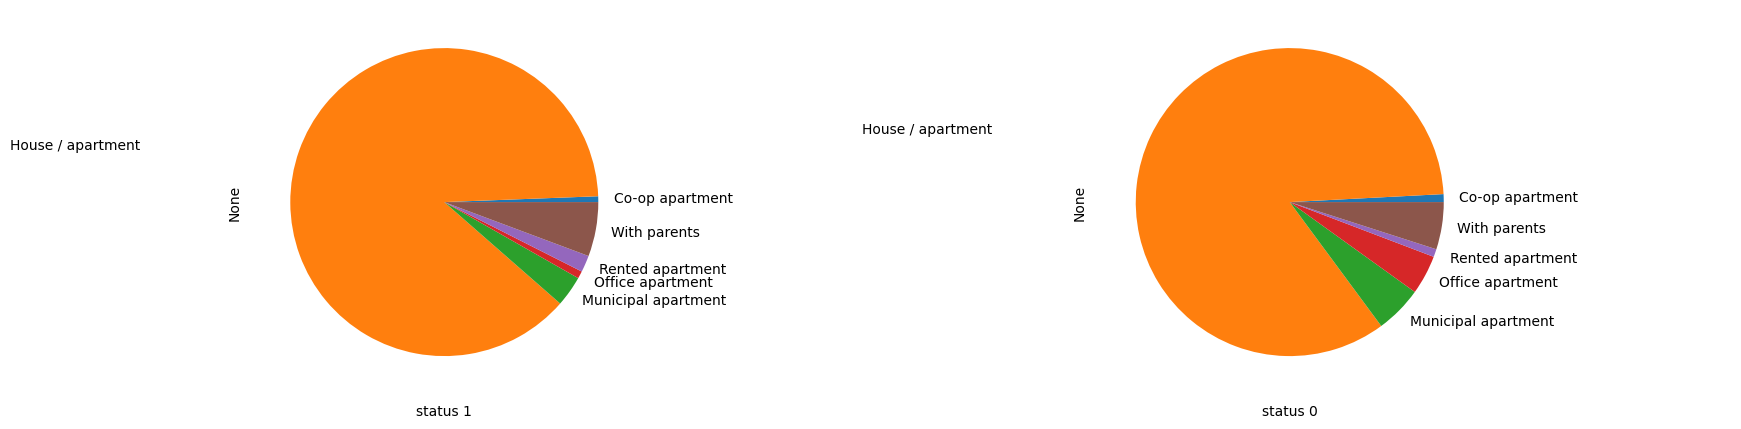

In [267]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
df.loc[df["Status"]==1, "Housing_Type"].reset_index().groupby("Housing_Type").size().plot(kind="pie", ax=ax1)
df.loc[df["Status"]==0, "Housing_Type"].reset_index().groupby("Housing_Type").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("status 1")
ax2.set_xlabel("status 0")

From the distribution above. There are some attributes that does not have significant difference in distribution between STATUS=0 and STATUS=1, but some have significant difference. Intuitively the more diverse the distribution between STATUS=0 and STATUS=1 more likely the attributes will be useful as a feature. Some of them are:

1. Education_Type
2. Income_Type
3. Applicant_Gender

## 3. Select the Features

In [268]:
df_selected = df[['Status','Applicant_ID', 'Applicant_Age', 'Owned_Car', 'Owned_Realty','Owned_Phone','Total_Children','Total_Family_Members','Total_Income','Years_of_Working','Total_Good_Debt','Total_Bad_Debt','Income_Type','Education_Type','Applicant_Gender']]

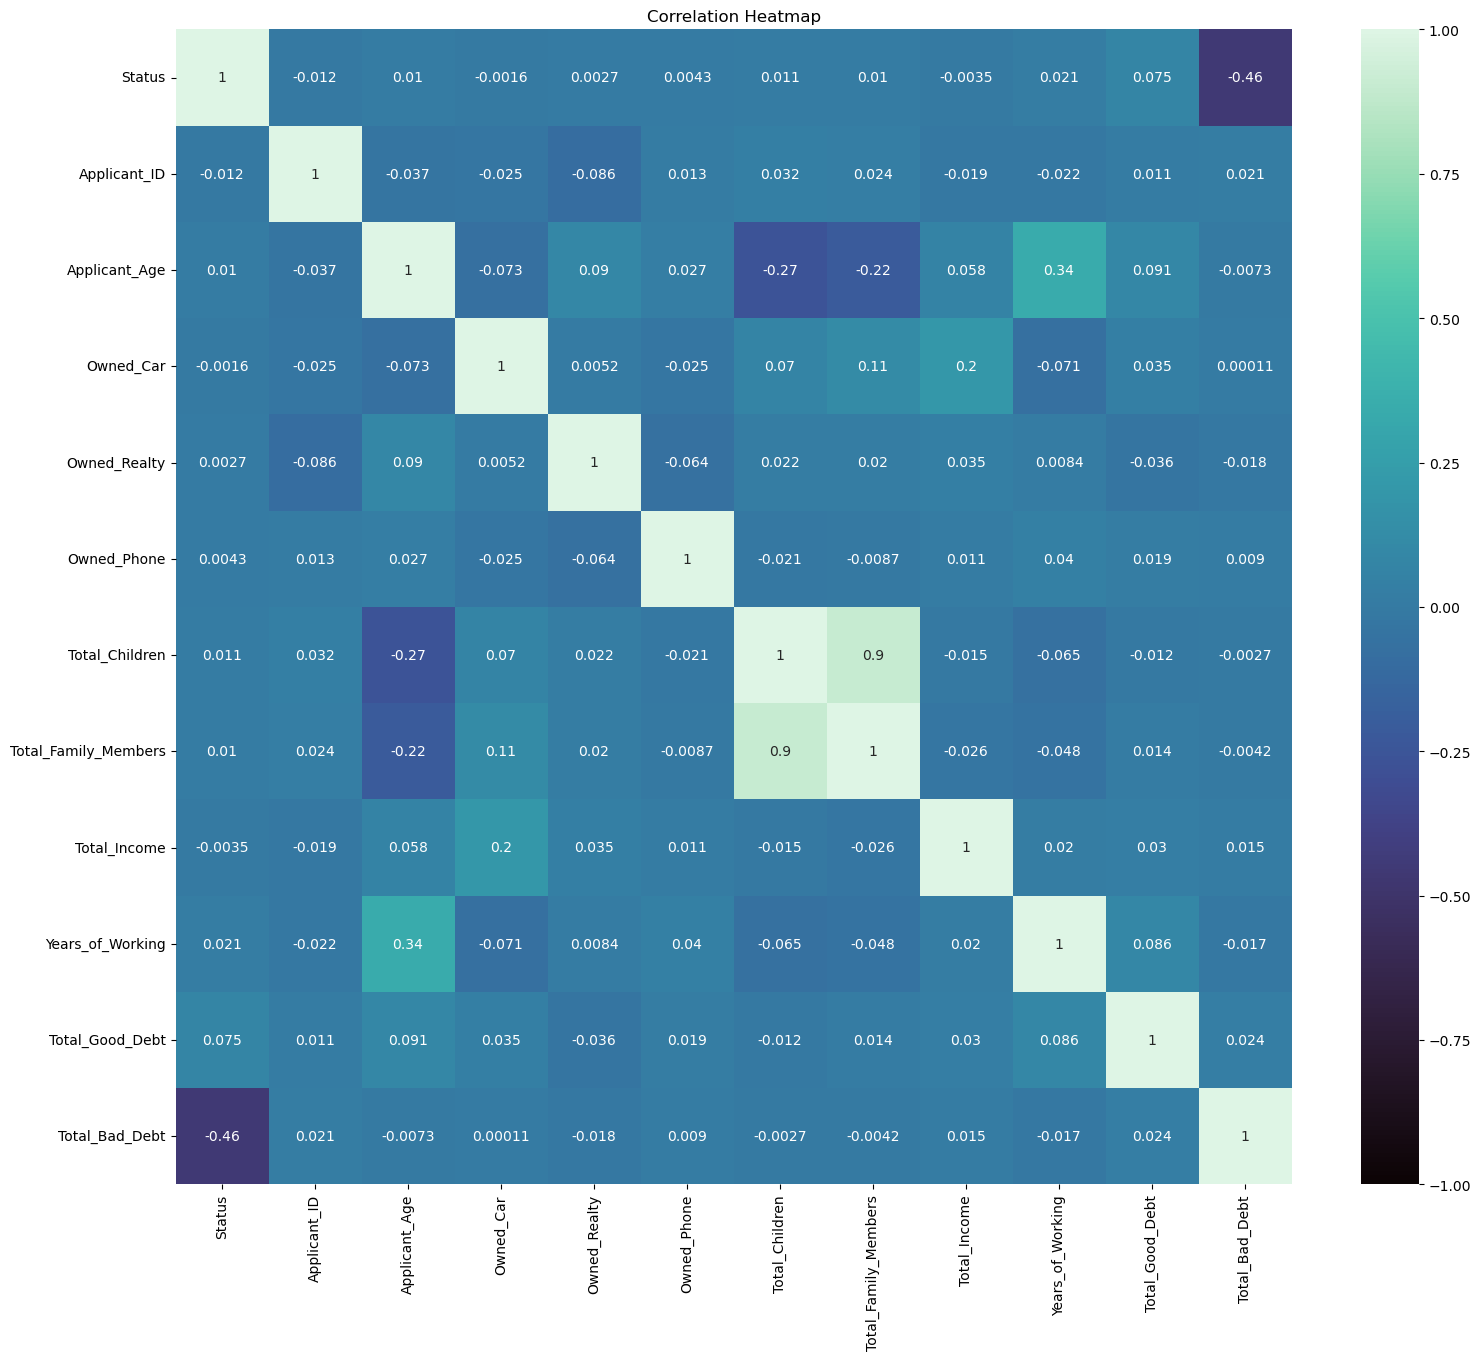

In [269]:
corr = df_selected.corr()

plt.figure(figsize=(18,15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

# Feature Transformation

## 1. Transform Ordinal Object Typed Attribute

In [270]:
df_selected['Education_Type'].unique()

array(['Secondary / secondary special                     ',
       'Higher education                                  ',
       'Incomplete higher                                 ',
       'Lower secondary                                   ',
       'Academic degree                                   '], dtype=object)

Object-type attribute that has value that can be ranked is **Education_Type**. That attribute can be ranked and transformed like this:

Lower secondary = 0

Secondary / secondary special = 1

Incomplete higher = 2

Higher education = 3

Academic degree = 4

In [271]:
#Map the atribute into ordinal numbers from 0-4
df_selected['Education_Type'] = df_selected['Education_Type'].str.strip()

scale_mapper = {'Lower secondary' : 0,'Secondary / secondary special' : 1,
'Incomplete higher' : 2,'Higher education' : 3,'Academic degree' : 4}

df_selected['Education_Type'] = df_selected['Education_Type'].replace(scale_mapper)

/var/folders/g5/7b253x210tngdnlzs7w4bbs00000gn/T/ipykernel_65915/3304081288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Education_Type'] = df_selected['Education_Type'].str.strip()
/var/folders/g5/7b253x210tngdnlzs7w4bbs00000gn/T/ipykernel_65915/3304081288.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Education_Type'] = df_selected['Education_Type'].replace(scale_mapper)


In [272]:
df_selected['Education_Type'].unique()

array([1, 3, 2, 0, 4])

## 2. Transform Categorical Object Typed Attribute

In [273]:
df_selected['Applicant_Gender'].unique()

array(['M      ', 'F      '], dtype=object)

In [274]:
df_selected['Income_Type'].unique()

array(['Working                                           ',
       'Commercial associate                              ',
       'State servant                                     ',
       'Student                                           ',
       'Pensioner                                         '], dtype=object)

In [275]:
#Create dummies/one-hot encoding on every nominal attributes in dataframe
Applicant_Gender_dummies = pd.get_dummies(df_selected['Applicant_Gender'],prefix='Applicant_Gender')
Income_Type_dummies = pd.get_dummies(df_selected['Income_Type'],prefix='Income_Type')

In [276]:
#Concate the dummies into train dataset
df_selected = pd.concat([df_selected, Applicant_Gender_dummies, Income_Type_dummies], axis=1)

#Drop categorical attribute (before transformation)
df_selected = df_selected.drop(['Applicant_Gender','Income_Type'], axis=1)

In [277]:
df_selected.head()

,Status,Applicant_ID,Applicant_Age,Owned_Car,Owned_Realty,Owned_Phone,Total_Children,Total_Family_Members,Total_Income,Years_of_Working,Total_Good_Debt,Total_Bad_Debt,Education_Type,Applicant_Gender_F,Applicant_Gender_M,Income_Type_Commercial associate,Income_Type_Pensioner,Income_Type_State servant,Income_Type_Student,Income_Type_Working
0,1,5008806,59,1,1,0,0,2,112500,4,30,0,1,0,1,0,0,0,0,1
1,1,5008808,53,0,1,1,0,1,270000,9,5,0,1,1,0,1,0,0,0,0
2,1,5008809,53,0,1,1,0,1,270000,9,5,0,1,1,0,1,0,0,0,0
3,1,5008810,53,0,1,1,0,1,270000,9,27,0,1,1,0,1,0,0,0,0
4,1,5008811,53,0,1,1,0,1,270000,9,39,0,1,1,0,1,0,0,0,0


## 3. Split features and label

In [278]:
y = df_selected.iloc[:, 0].values
x = df_selected.iloc[:, 1:19].values

## 4. Using SMOTE to handle imbalance data

In [279]:
smote = SMOTE()

In [280]:
x_smote, y_smote = smote.fit_resample(x, y)

## 5. Scale the data using Standard Scaler

In [281]:
#Scale the data
sc = StandardScaler()
x_smote = sc.fit_transform(x_smote)

In [282]:
x_smote

array([[-1.8015535 ,  2.07972409,  1.54599164, ..., -0.04385378,
        -0.22632328, -0.01414157],
       [-1.80150478,  1.42119018, -0.64683403, ..., -0.04385378,
        -0.22632328, -0.01414157],
       [-1.80148042,  1.42119018, -0.64683403, ..., -0.04385378,
        -0.22632328, -0.01414157],
       ...,
       [ 0.83547012, -1.21294544,  1.54599164, ..., -0.04385378,
        -0.22632328, -0.01414157],
       [ 0.2504825 ,  0.54314498,  1.54599164, ..., -0.04385378,
        -0.22632328, -0.01414157],
       [ 1.45161193,  0.54314498,  1.54599164, ..., -0.04385378,
        -0.22632328, -0.01414157]])

In [283]:
x_smote.mean()

-3.2038085702641025e-16

## 6. Split Train and Test

Split the training set into 70% and the test set into 30%, and set random seeds to ensure that the code is reproducible.

In [284]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = .3, random_state = 18)

# Model Building

## 1. Train Logistic Regression Model

In [285]:
classifier =  LogisticRegression(max_iter=3000)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

## 2. Evaluate the model

In [286]:
log_accuracy=accuracy_score(y_test, y_pred)
log_recall=recall_score(y_test,y_pred)
log_precision=precision_score(y_test,y_pred)
log_rocauc=roc_auc_score(y_test,y_pred)

In [287]:
print('{:.4f}'.format(log_accuracy), '- Log Accuracy')
print('{:.4f}'.format(log_recall), '- Log Recall')
print('{:.4f}'.format(log_precision), '- Log Precision')
print('{:.4f}'.format(log_rocauc), '- Log ROC AUC')

0.9975 - Log Accuracy
0.9953 - Log Recall
0.9997 - Log Precision
0.9975 - Log ROC AUC


1. The accuracy tells you how well the model is doing overall.
2. The recall and precision give insights into how well the model is performing on positive instances.
3. ROC AUC provides a comprehensive measure of the model's ability to distinguish between classes.

Our model performs very well.

## 3. Rank the Applicant

In [288]:
predictions = classifier.predict_proba(x_test)
predictions

array([[1.68164149e-10, 1.00000000e+00],
       [9.93037251e-01, 6.96274860e-03],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [1.03317771e-05, 9.99989668e-01],
       [9.99997840e-01, 2.16038013e-06],
       [9.38335712e-01, 6.16642878e-02]])

In [289]:
df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(classifier.predict(x_test), columns = ['predicted_STATUS'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])

df=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)
df.sort_values(by=['prob_0'],  ascending=[False],inplace=True)

In [290]:
df

,Actual Outcome,prob_0,prob_1,predicted_STATUS
2224,0,1.0,6.008214e-19,0
10956,0,1.0,3.133226e-18,0
10908,0,1.0,6.638936e-18,0
4322,0,1.0,3.671526e-20,0
10917,0,1.0,4.200129e-24,0
...,...,...,...,...
8962,1,0.0,1.000000e+00,1
1720,1,0.0,1.000000e+00,1
5234,1,0.0,1.000000e+00,1
12029,1,0.0,1.000000e+00,1


## 4. Confusion matrix

In [291]:
confusion_matrix_logit = confusion_matrix(y_test, y_pred)
print(confusion_matrix_logit)

[[7494    2]
 [  35 7474]]


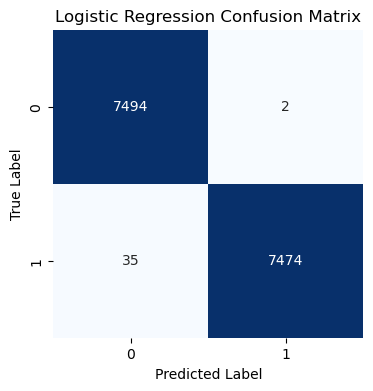

In [292]:
confusion_matrix_logit = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix_logit, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 1. KNN

In [293]:
n = 2
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

/Users/tianguozhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## 2. Evaluate the model

In [294]:
log_accuracy=accuracy_score(y_test, y_pred)
log_recall=recall_score(y_test,y_pred)
log_precision=precision_score(y_test,y_pred)
log_rocauc=roc_auc_score(y_test,y_pred)

print('{:.4f}'.format(log_accuracy), '- Log Accuracy')
print('{:.4f}'.format(log_recall), '- Log Recall')
print('{:.4f}'.format(log_precision), '- Log Precision')
print('{:.4f}'.format(log_rocauc), '- Log ROC AUC')

0.9963 - Log Accuracy
0.9935 - Log Recall
0.9991 - Log Precision
0.9963 - Log ROC AUC


## 4. Confusion matrix

In [295]:
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)
pd.crosstab(y_test,y_pred)

col_0,0,1
row_0,,
0,7489,7
1,49,7460


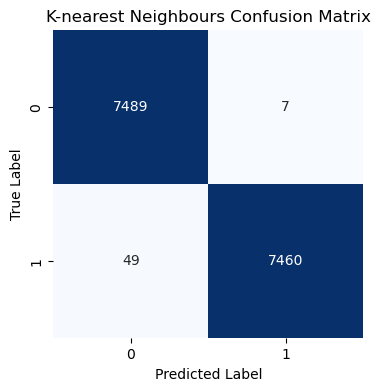

In [296]:
confusion_matrix_knn = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('K-nearest Neighbours Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 1. SVM

In [297]:
svm = LinearSVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

/Users/tianguozhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## 2. Evaluate the model

In [298]:
log_accuracy=accuracy_score(y_test, y_pred)
log_recall=recall_score(y_test,y_pred)
log_precision=precision_score(y_test,y_pred)
log_rocauc=roc_auc_score(y_test,y_pred)

print('{:.4f}'.format(log_accuracy), '- Log Accuracy')
print('{:.4f}'.format(log_recall), '- Log Recall')
print('{:.4f}'.format(log_precision), '- Log Precision')
print('{:.4f}'.format(log_rocauc), '- Log ROC AUC')

0.9993 - Log Accuracy
0.9988 - Log Recall
0.9999 - Log Precision
0.9993 - Log ROC AUC


## 4. Confusion matrix

In [299]:
pd.crosstab(y_test,y_pred)

col_0,0,1
row_0,,
0,7495,1
1,9,7500


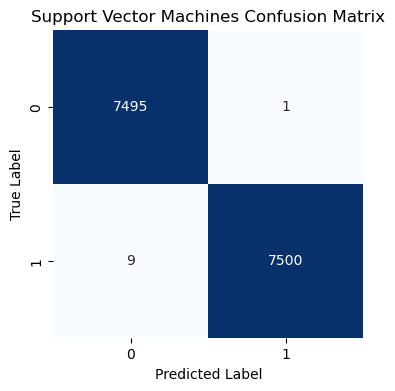

In [300]:
confusion_matrix_svm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Support Vector Machines Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 1. Decision trees

In [301]:
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=5)
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)

## 2. Evaluate the model

In [302]:
log_accuracy=accuracy_score(y_test, y_pred)
log_recall=recall_score(y_test,y_pred)
log_precision=precision_score(y_test,y_pred)
log_rocauc=roc_auc_score(y_test,y_pred)

print('{:.4f}'.format(log_accuracy), '- Log Accuracy')
print('{:.4f}'.format(log_recall), '- Log Recall')
print('{:.4f}'.format(log_precision), '- Log Precision')
print('{:.4f}'.format(log_rocauc), '- Log ROC AUC')

0.9909 - Log Accuracy
0.9819 - Log Recall
0.9999 - Log Precision
0.9909 - Log ROC AUC


## 4. Confusion matrix

In [303]:
pd.crosstab(y_test,y_pred)

col_0,0,1
row_0,,
0,7495,1
1,136,7373


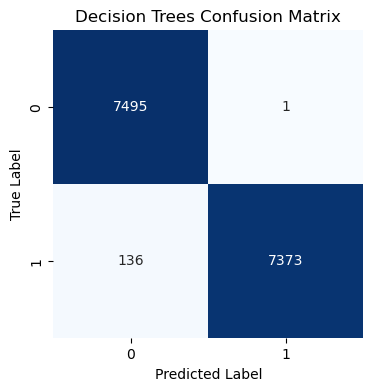

In [304]:
confusion_matrix_tree = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Decision Trees Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Final comparison and summary

### Visualization of the results

/Users/tianguozhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


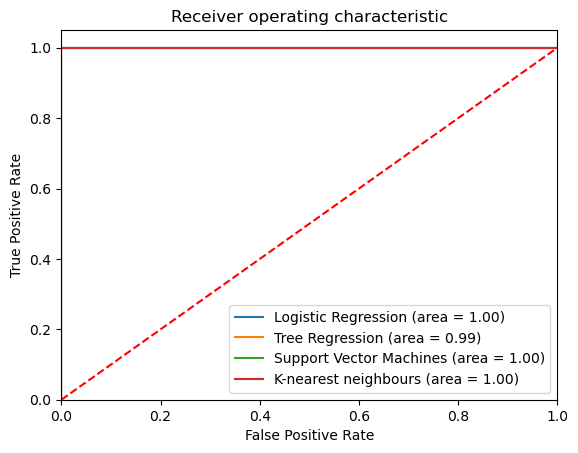

In [305]:
logit_roc_auc = roc_auc_score(y_test, classifier.predict(x_test))
tree_roc_auc = roc_auc_score(y_test, dtree.predict(x_test))
knn_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
svm_roc_auc = roc_auc_score(y_test, svm.predict(x_test))

fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, svm.decision_function(x_test))

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Tree Regression (area = %0.2f)' % tree_roc_auc)
plt.plot(fpr, tpr, label='Support Vector Machines (area = %0.2f)' % svm_roc_auc)
plt.plot(fpr, tpr, label='K-nearest neighbours (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

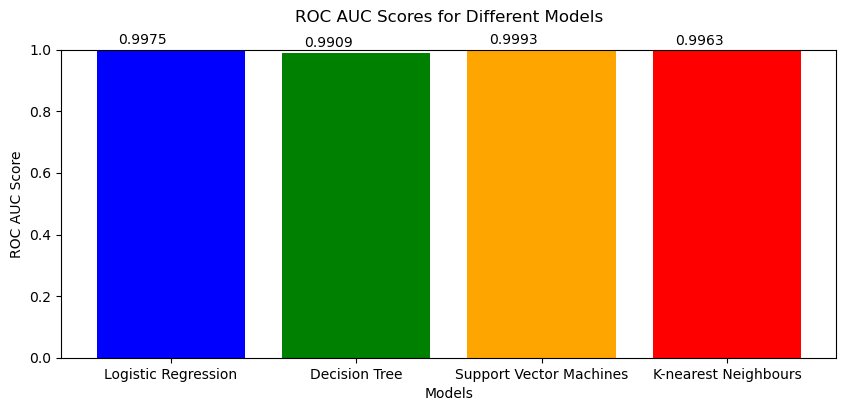

In [316]:
# ROC AUC scores
roc_auc_scores = [logit_roc_auc, tree_roc_auc, svm_roc_auc, knn_roc_auc]
models = ['Logistic Regression', 'Decision Tree', 'Support Vector Machines', 'K-nearest Neighbours']

# Create histogram
plt.figure(figsize=(10, 4))
bars = plt.bar(models, roc_auc_scores, color=['blue', 'green', 'orange', 'red'])

# Add annotations to each bar
for bar, score in zip(bars, roc_auc_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.01, f'{score:.4f}', ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Scores for Different Models', pad=20)  # Increase the distance between title and plot
plt.ylim(0.0, 1.0)  # Set the y-axis range between 0 and 1
plt.show()

## Final Summary

ROC (Receiver Operating Characteristic) and AUC (Area Under the Curve) are metrics used for evaluating the performance of binary classification models, particularly in the context of sensitivity and specificity.

ROC and AUC values provide information about the trade-off between true positive rate and false positive rate at different classification thresholds.

In this project I am using binary classification, so I will focus on explaining and comparing the ROC and AUC values of the model evaluations.

1. **Logistic Regression**:

    ROC AUC Score: 0.9975

2. **Decision Tree**:

    ROC AUC Score: 0.9909

3. **Support Vector Machines (SVM)**:

    ROC AUC Score: 0.9993

4. **K-nearest Neighbours (KNN)**:

    ROC AUC Score: 0.9963

A higher ROC AUC score generally indicates better discrimination ability. In my case, all models have achieved high ROC AUC scores, with **SVM achieving the highest score of 0.9993.**